# Stock Price Prediction using Machine Learning

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

## Loading dataset

In [2]:
df = pd.read_csv("stock.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-27,71.320000,71.635002,71.320000,71.324997,71.324997,0
1,2020-01-28,71.654999,71.654999,71.178001,71.440002,71.440002,0
2,2020-01-29,71.230103,71.425003,71.168503,71.230400,71.230400,0
3,2020-01-30,71.300003,71.711998,71.300003,71.300003,71.300003,0
4,2020-01-31,71.639999,71.639999,71.277496,71.639999,71.639999,0


## Data Preparation

In [3]:
df.shape

(262, 7)

In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,262.000000,262.000000,262.000000,262.000000,262.000000,262.0
mean,74.373533,74.631087,74.011048,74.358489,74.358489,0.0
std,1.417620,1.494521,1.311330,1.426245,1.426245,0.0
min,71.100403,71.279999,71.064003,71.099998,71.099998,0.0
25%,73.546175,73.706577,73.202003,73.531049,73.531049,0.0
50%,74.332001,74.531300,73.881748,74.275799,74.275799,0.0
75%,75.484551,75.737499,75.067053,75.489424,75.489424,0.0
max,77.684998,77.754997,76.496300,77.570000,77.570000,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       262 non-null    object 
 1   Open       262 non-null    float64
 2   High       262 non-null    float64
 3   Low        262 non-null    float64
 4   Close      262 non-null    float64
 5   Adj Close  262 non-null    float64
 6   Volume     262 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.5+ KB


In [6]:
df[df['Close'] == df['Adj Close']].shape

(262, 7)

In [7]:
df = df.drop(['Adj Close'], axis=1)

In [8]:
df = df.drop(['Volume'], axis=1)

In [9]:
df.head()

,Date,Open,High,Low,Close
0,2020-01-27,71.320000,71.635002,71.320000,71.324997
1,2020-01-28,71.654999,71.654999,71.178001,71.440002
2,2020-01-29,71.230103,71.425003,71.168503,71.230400
3,2020-01-30,71.300003,71.711998,71.300003,71.300003
4,2020-01-31,71.639999,71.639999,71.277496,71.639999


In [10]:
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

## Exploratory Data Analysis (EDA)

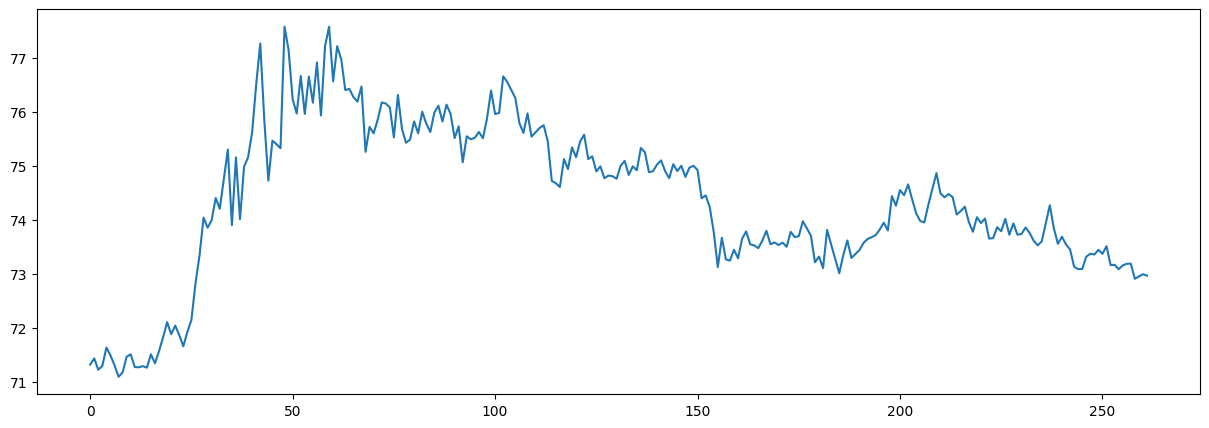

In [11]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.show()

## The prices of stocks are showing an downward trend as depicted by the plot of the closing price of the stocks.

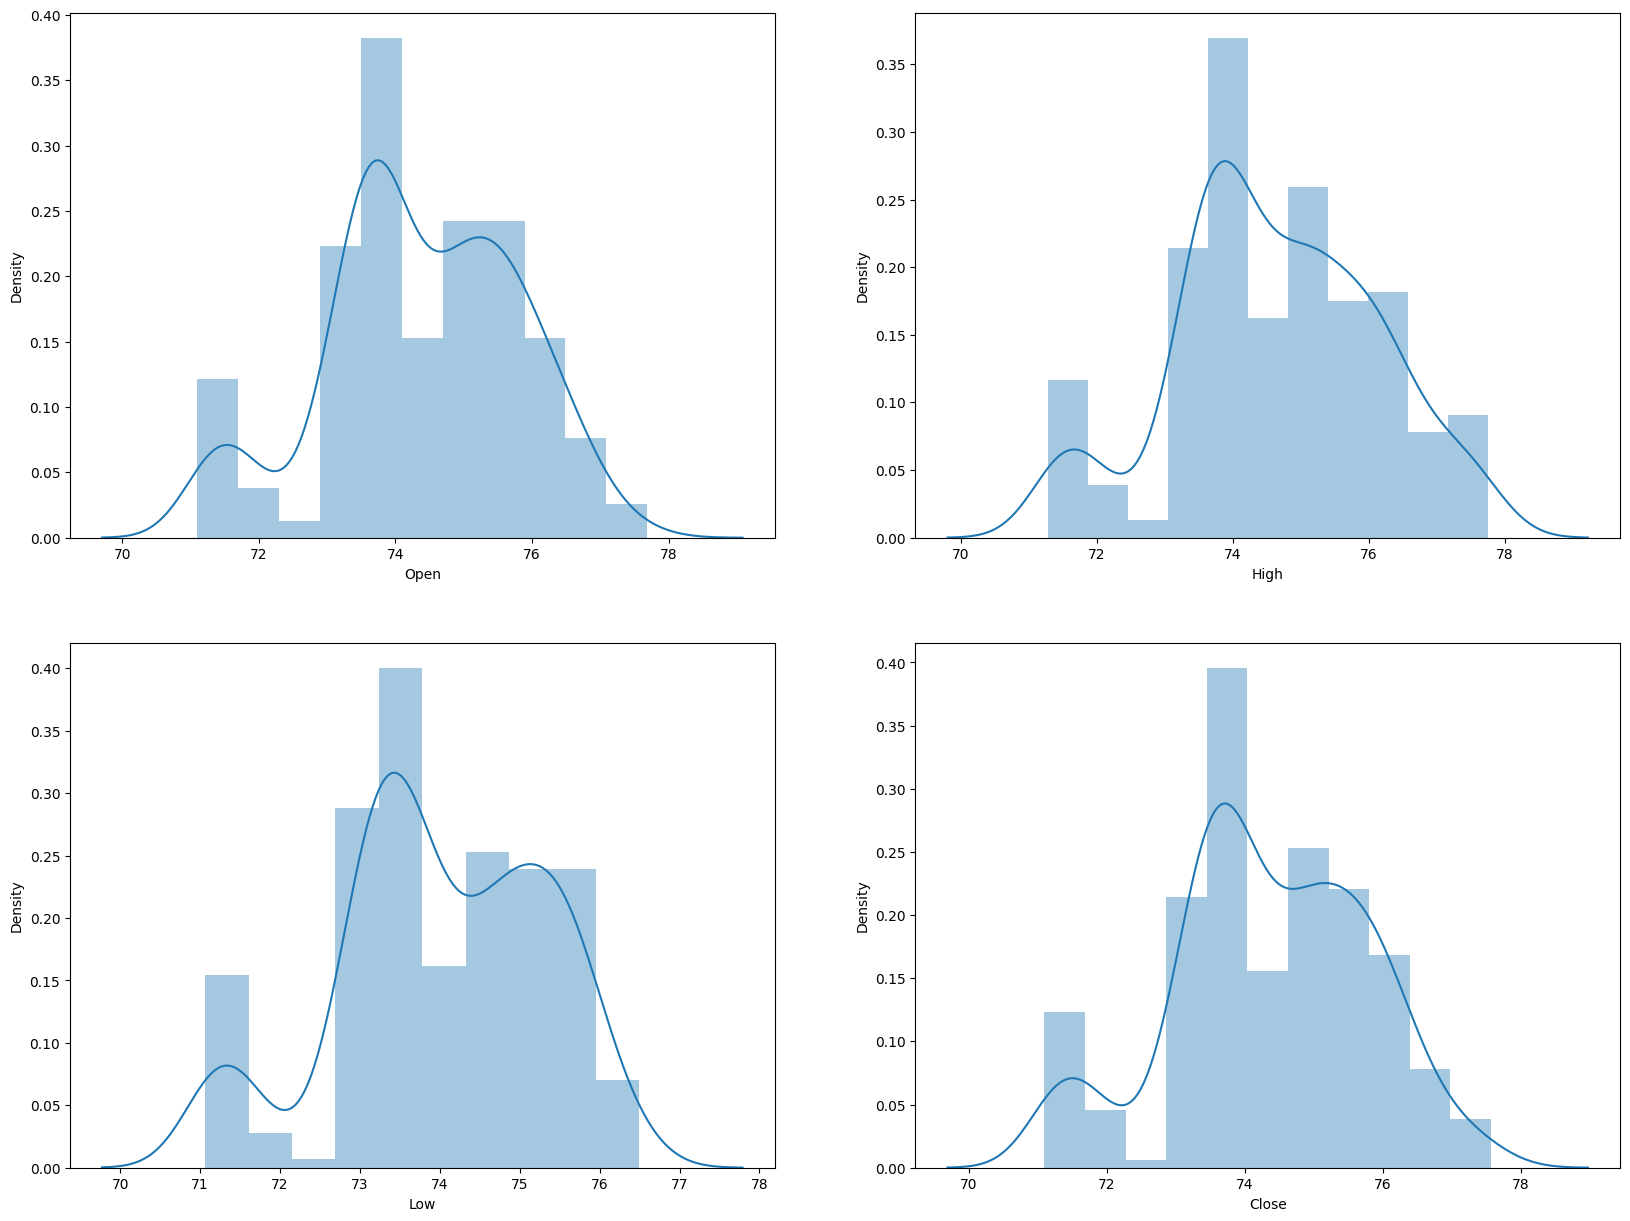

In [12]:
features = ['Open', 'High', 'Low', 'Close']

plt.subplots(figsize=(20,15))

for i, col in enumerate(features):
    plt.subplot(2, 2,i+1)
    sb.distplot(df[col])
plt.show()

### We can see three peaks which means the data has varied significantly in three regions

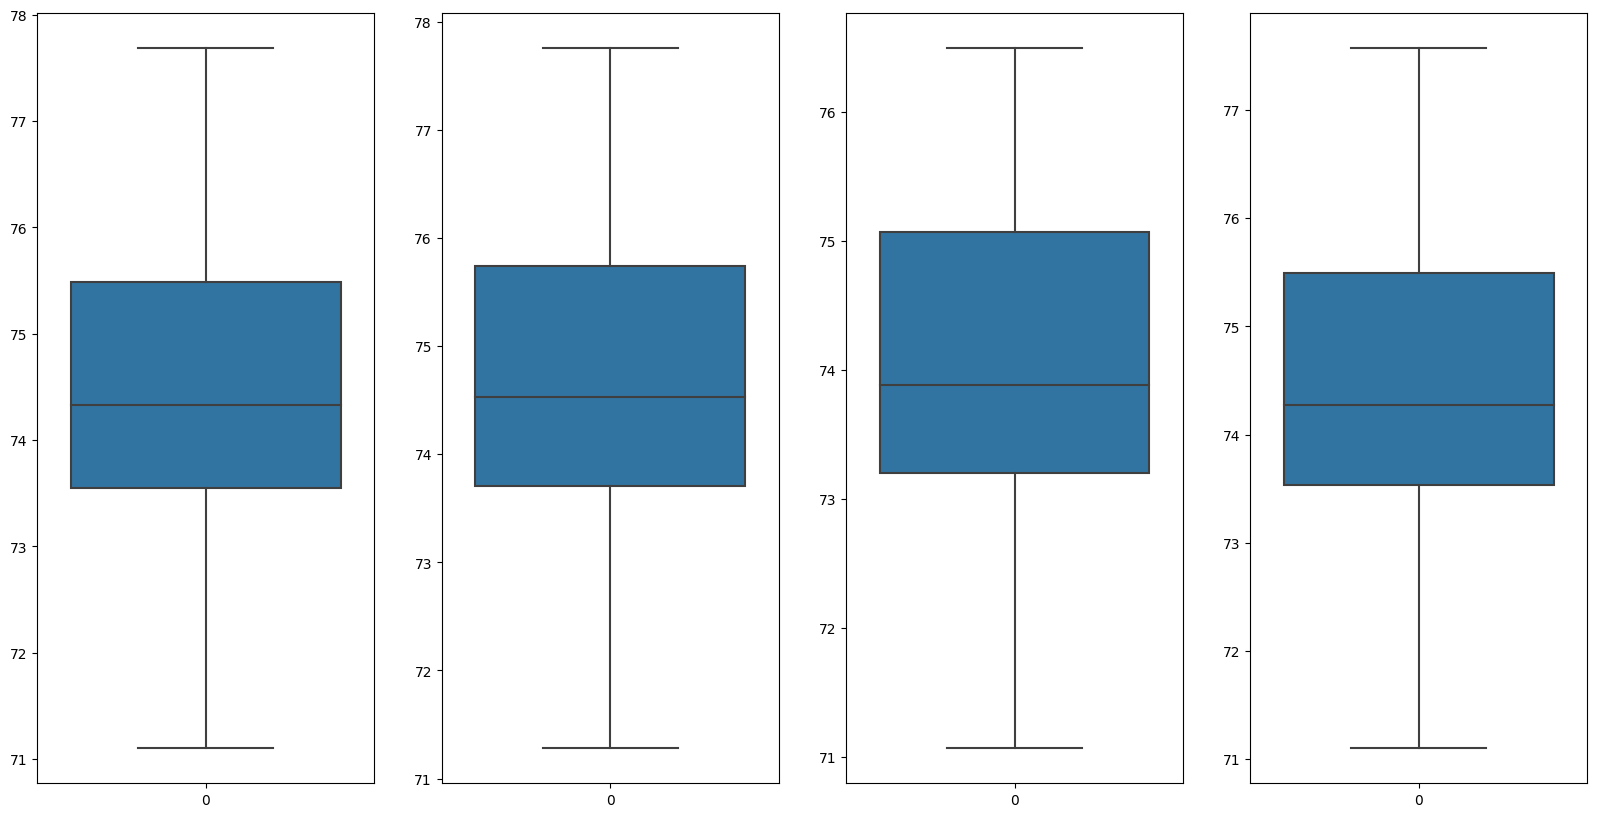

In [13]:
plt.subplots(figsize =(20,10))

for i, col in enumerate(features):
    plt.subplot(1, 4, i+1)
    sb.boxplot(df[col])
plt.show()

### We can conclude that all the columns are free from outlier

## Feature Engineering

In [241]:
splitted = df['Date'].str.split('-', expand=True)

df['month'] = splitted[1].astype('int')
df['year'] = splitted[0].astype('int')
df['day'] = splitted[2].astype('int')

df.head()


,Date,Open,High,Low,Close,month,year,day
0,2020-01-27,71.320000,71.635002,71.320000,71.324997,1,2020,27
1,2020-01-28,71.654999,71.654999,71.178001,71.440002,1,2020,28
2,2020-01-29,71.230103,71.425003,71.168503,71.230400,1,2020,29
3,2020-01-30,71.300003,71.711998,71.300003,71.300003,1,2020,30
4,2020-01-31,71.639999,71.639999,71.277496,71.639999,1,2020,31


In [245]:
df['Date'] = pd.to_datetime(df.Date, dayfirst = True)

In [249]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,month,year,day,open-close,low-high,target,is_quarter_end
0,2020-01-27,71.320000,71.635002,71.320000,71.324997,1,2020,27,-0.004997,-0.315002,1,0
1,2020-01-28,71.654999,71.654999,71.178001,71.440002,1,2020,28,0.214997,-0.476998,0,0
2,2020-01-29,71.230103,71.425003,71.168503,71.230400,1,2020,29,-0.000297,-0.256500,1,0
3,2020-01-30,71.300003,71.711998,71.300003,71.300003,1,2020,30,0.000000,-0.411995,1,0
4,2020-01-31,71.639999,71.639999,71.277496,71.639999,1,2020,31,0.000000,-0.362503,0,0


In [251]:
df = df.drop(['Date'], axis = 'columns')

In [255]:
df.groupby('is_quarter_end').mean()

,Open,High,Low,Close,month,year,day,open-close,low-high,target
is_quarter_end,,,,,,,,,,
0,74.320218,74.549602,73.991472,74.310516,5.988439,2020.104046,16.000000,0.009703,-0.558130,0.502890
1,74.477166,74.789480,74.049102,74.451739,7.550562,2020.000000,15.561798,0.025427,-0.740378,0.516854


In [256]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


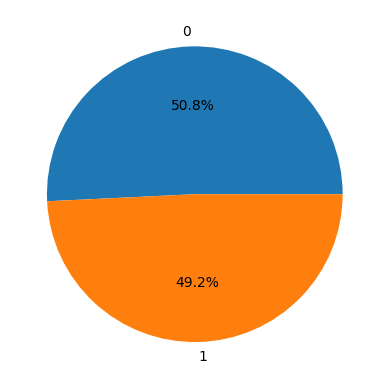

In [287]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

### Checking whether the target is balanced or not using a pie chart.

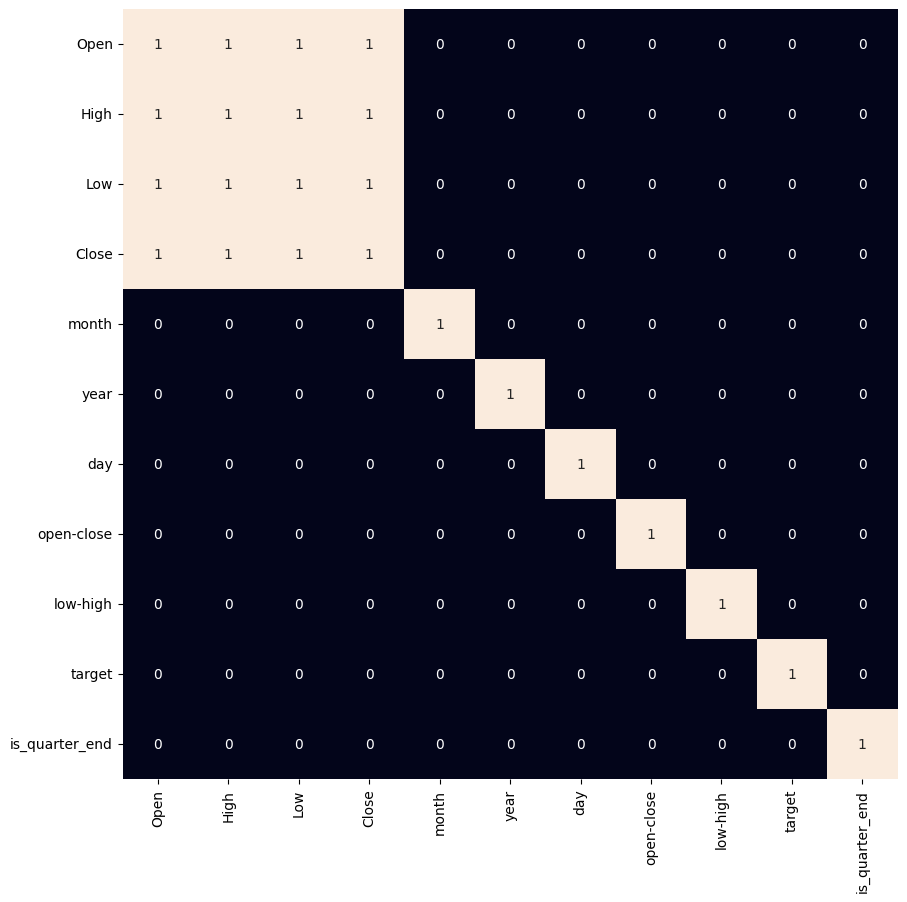

In [290]:
plt.figure(figsize=(10, 10))

sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()


### We can say that there is a high correlation between OHLC

## Data Splitting and normalization

In [271]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.25, random_state=2022)
print(X_train.shape, X_test.shape)

(196, 3) (66, 3)


## Model Development and Evaluation

In [275]:
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier(n_estimators = 100)]

for i in range(3):
    models[i].fit(X_train, Y_train)

    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
    print('Testing Accuracy : ', metrics.roc_auc_score(Y_test, models[i].predict_proba(X_test)[:,1]))
    print()

LogisticRegression() : 
Training Accuracy :  0.5609217171717172
Testing Accuracy :  0.5639024390243903

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.433080808080808
Testing Accuracy :  0.4517073170731707

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training Accuracy :  0

### Among the three models, we have trained XGBClassifier has the highest performance but it is pruned to overfitting as the difference between the training and the testing accuracy is too high. But in the case of the Logistic Regression, this is not the case.

<Axes: >

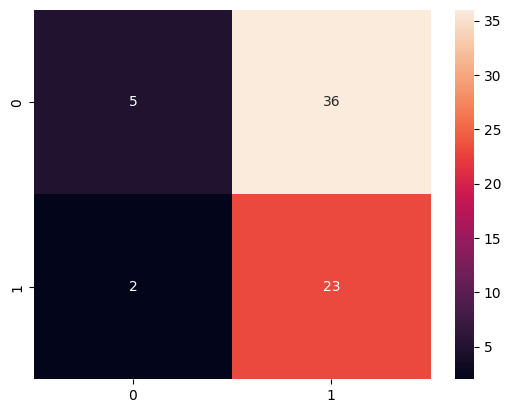

In [288]:
y_pred = models[0].predict(X_test) 
cm = metrics.confusion_matrix(Y_test, y_pred)
sb.heatmap(cm,annot=True)

### CONCLUSION:
### We can observe that the accuracy achieved by the ML model is not better than simply guessing with a probability of 50%. Possible reasons for this may be the lack of data or using a very simple model to perform such a complex task as Stock Market prediction.